# Author- Ved Lad GRIPSEPTEMBER21

# PREDICTION USING SUPERVISED LEARNING ML

### DATA - STUDENT DATA on hours and scores
* We have to predict the percentage of students based on their marks.

#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the Data
csv =  "http://bit.ly/w-data"
df = pd.read_csv(csv)
print("Data is successfully imported and the top 5 rows are below : ")
df.head()

Data is successfully imported and the top 5 rows are below : 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print('Display the bottom 5 rows : ')
df.tail()

Display the bottom 5 rows : 


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# checking the shape of the data

df.shape

(25, 2)

* This data has 25 rows and 2 columns

In [5]:
# Displaying  the full summary of the data .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:

# Displaying the  percentiles,mean,std,max,count of the given dataset.

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking the null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

* The data has no Null values

In [8]:
# checking the duplicate values
df.duplicated().sum()

0

* There is no duplicate value in the dataset

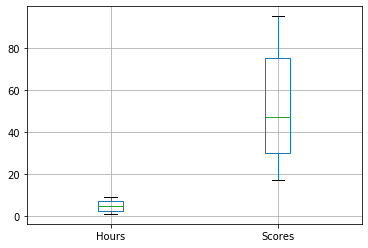

In [9]:
# Checking the Outliers

df.boxplot()

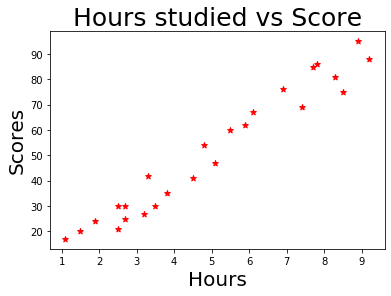

In [10]:
# Checking the Linear relationship among the columns

plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours studied vs Score', fontsize=25)
plt.scatter(df.Hours,df.Scores,color='red',marker='*')
plt.show()

* The above plot indicates positive linear relationship of  hours with score
* The more hours you put on study the more score you can get.

### Preparing data for Linear Regression

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42 ,test_size=0.2)

In [13]:
## Data has splited into  80:20 ratio

print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (20, 1)
y train.shape = (20,)
X test.shape  = (5, 1)
y test.shape  = (5,)


### Training the Model.

In [14]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()

In [15]:
##Fitting Training Data
lir.fit(X_train,y_train)
print("Training data has been fitted")

Training data has been fitted


In [16]:
print("B0 =",lir.intercept_,"\nB1 =",lir.coef_)

B0 = 2.826892353899737 
B1 = [9.68207815]


*  B0 is the Intercept 
*  B1 is Slope of the line

In [17]:
## Plotting the REGRESSION LINE---
y0 = lir.intercept_ + lir.coef_*X_train

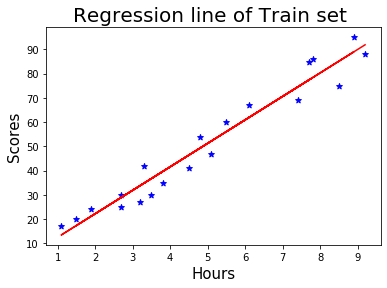

In [18]:
##plotting on train data
plt.scatter(X_train,y_train,color='blue',marker='*')
plt.plot(X_train,y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line of Train set ",fontsize=20)
plt.show()

### Prediction  on test date

In [19]:
y_pred=lir.predict(X_test)##predicting the Scores for test data
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


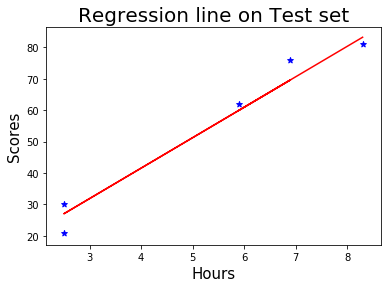

In [20]:
#plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line on Test set",fontsize=20)
plt.show()

## Comparing Actual vs Predicted Scores

In [21]:
y_test1 = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':y_test1,'Result':prediction})
df_compare

,Actual,Result
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### ACCURACY OF THE MODEL

In [22]:

from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9678055545167994

* Above 95% percentage indicates that above fitted Model is a GOOD MODEL

### Predicting the Error

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  18.943211722315272
Root Mean Squared Error =  4.352380006653288
Mean Absolute Error     =  4.352380006653288


### Predicting the score

In [24]:
Prediction_score = lir.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [92.38611528]


## CONCLUSION

##### From the above result we can say that if a studied for 9.25 then student will secured 92.38 MARKS.

### End of TASK -1